## Get data

In [2]:
import requests               
from bs4 import BeautifulSoup 
import pickle   
import numpy as np

In [3]:
#definition to get text
def transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/comedy/jimmy-o-yang-good-deal-transcript/',
        'https://scrapsfromtheloft.com/comedy/ali-wong-baby-cobra-2016-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/pete-davidson-alive-from-new-york-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-sticks-stones-transcript/',
        'https://scrapsfromtheloft.com/comedy/trevor-noah-afraid-dark-2017-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-paper-tiger-transcript/',
        'https://scrapsfromtheloft.com/comedy/john-mulaney-kid-gorgeous-at-radio-city-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/john-mulaney-new-in-town-2012-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-shameless-2007-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/hasan-minhaj-homecoming-king-transcript/',
        'https://scrapsfromtheloft.com/comedy/kevin-hart-zero-fks-given-2020-transcript/',
        'https://scrapsfromtheloft.com/comedy/gabriel-fluffy-iglesias-one-show-fits-all-transcript/',
        'https://scrapsfromtheloft.com/comedy/tiffany-haddish-black-mitzvah-transcript/',
        'https://scrapsfromtheloft.com/comedy/hannah-gadsby-nanette-transcript/',
        'https://scrapsfromtheloft.com/comedy/hannah-gadsby-douglas-transcript/',
        'https://scrapsfromtheloft.com/comedy/amy-schumer-growing-transcript/',
        'https://scrapsfromtheloft.com/comedy/nikki-glaser-bangin-transcript/'
        ]


In [4]:
#url= 'https://scrapsfromtheloft.com/comedy/jimmy-o-yang-good-deal-transcript/'
#page = requests.get(url).text
#soup = BeautifulSoup(page, "lxml")
 

# URLs of transcripts in scope


In [5]:
#result = soup.find('p')
#result = job_element.find("p", p style="text-align: justify;")
#print(soup.find_all('p',style=lambda value: value and 'text-align:justify' in value)
#print(soup.find_all("p",style=lambda value: value and 'text-align:justify' ))
     # .find_all("p",style=lambda value: value and 'text-align:justify').text
    
#print(soup.find_all('p'))

In [6]:
transcripts = [transcript(u) for u in urls]

https://scrapsfromtheloft.com/comedy/jimmy-o-yang-good-deal-transcript/
https://scrapsfromtheloft.com/comedy/ali-wong-baby-cobra-2016-full-transcript/
https://scrapsfromtheloft.com/comedy/pete-davidson-alive-from-new-york-transcript/
https://scrapsfromtheloft.com/comedy/dave-chappelle-sticks-stones-transcript/
https://scrapsfromtheloft.com/comedy/trevor-noah-afraid-dark-2017-full-transcript/
https://scrapsfromtheloft.com/comedy/bill-burr-paper-tiger-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-kid-gorgeous-at-radio-city-full-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-new-in-town-2012-full-transcript/
https://scrapsfromtheloft.com/comedy/louis-c-k-shameless-2007-full-transcript/
https://scrapsfromtheloft.com/comedy/hasan-minhaj-homecoming-king-transcript/
https://scrapsfromtheloft.com/comedy/kevin-hart-zero-fks-given-2020-transcript/
https://scrapsfromtheloft.com/comedy/gabriel-fluffy-iglesias-one-show-fits-all-transcript/
https://scrapsfromtheloft.co

In [7]:
comedians = ['jimmy o yang', 'ali wong','pete-davidson','dave-chappelle',
             'trevor-noah','bill-burr','john-mulaney_1','john-mulaney_2','louis-c-k','hasan-minhaj','kevin-hart','gabriel-fluffy-iglesias','tiffany-haddish','hannah-gadsby1','hannah-gadsby2','amy-schumer','nikki-glaser']
gender = ['m', 'f','m','m',
             'm','m','m','m','m','m','m','m','f','f','f','f','f']

In [8]:
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [9]:
# Load pickle file
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [10]:
data.keys() ,data['ali wong'][:1]

(dict_keys(['jimmy o yang', 'ali wong', 'pete-davidson', 'dave-chappelle', 'trevor-noah', 'bill-burr', 'john-mulaney_1', 'john-mulaney_2', 'louis-c-k', 'hasan-minhaj', 'kevin-hart', 'gabriel-fluffy-iglesias', 'tiffany-haddish', 'hannah-gadsby1', 'hannah-gadsby2', 'amy-schumer', 'nikki-glaser']),
 ['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming.'])

In [11]:
#combine data function
def combine(list_text):
    return ' '.join(list_text)

In [12]:
data_combo = {key:combine(value) for key,value in data.items()}

In [13]:
import pandas as pd
pd.set_option('max_colwidth',200)

data_df=pd.DataFrame.from_records([data_combo],index = ['script']).transpose()
#data_df =data_df.sort_index()

data_df['gender'] = gender
data_df

,script,gender
jimmy o yang,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...",m
ali wong,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...",f
pete-davidson,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, 2014 or ’15, uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get...",m
dave-chappelle,"Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...",m
trevor-noah,"[audience cheering] [music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. Thank you for coming out. We’re gonna have fun tonight. Welcome to it, people. This is...",m
bill-burr,"Recorded Live at the Royal Albert Hall, London, England [cheering and applause] [female announcer] Ladies and gentlemen, please welcome Bill Burr! All right, thank you. Thank you very much. Thank ...",m
john-mulaney_1,[organ music playing] Welcome to Radio City Music Hall. It’s time. Any questions? No. Walk with me. [eerie organ music playing] [mechanical whirring] [audience applauding and cheering] Good evenin...,m
john-mulaney_2,"[funky 90’s beat and cityscape pan] [singing] ♬ New in town, [John Mulaney jumps out of apartment with rolled up papers] ♬ John Mulaney’s New In Town… [John tries to put mustard on his hot dog and...",m
louis-c-k,"Please welcome Louis C.K.! Thank you. Thank you. Thank you. Thank you, thanks, that’s very nice. Hello, everybody. How are ya? Woo! Good, thanks for- thank you, oh, good. Thanks, thanks for coming...",m
hasan-minhaj,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you want to do the special? LA, Chicago, New York?” I wa...",m


In [14]:
data_df.index

Index(['jimmy o yang', 'ali wong', 'pete-davidson', 'dave-chappelle',
       'trevor-noah', 'bill-burr', 'john-mulaney_1', 'john-mulaney_2',
       'louis-c-k', 'hasan-minhaj', 'kevin-hart', 'gabriel-fluffy-iglesias',
       'tiffany-haddish', 'hannah-gadsby1', 'hannah-gadsby2', 'amy-schumer',
       'nikki-glaser'],
      dtype='object')

In [15]:
print(data_df['script']['ali wong'][0:100])

Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank yo


## Treat Text

In [16]:
df = data_df['script']
df['ali wong'][0:100]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank yo'

In [17]:
#Text: remove numbers, captila letter and puctuation
import re
import string
#remove numer
alphanumeric= lambda x: re.sub('\w*\d\w*',' ',x)
# remove punctuation 
#lower case
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ',x.lower())
#df['ali wong']=df.map(alphanumeric)
data_df['script'] = data_df['script'].map(alphanumeric)#.map(punc_lower)
# remove  \n save for sentence tokenizer
#data_df['script'] = data_df['script'].map(lambda x: re.sub('\n',' ',x))


In [18]:
data_df['script']['ali wong'][0:100]


'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank yo'

## Sentence Tokenization

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.util import ngrams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
#Works if keep punctuation
sentences = sent_tokenize(data_df['script']['ali wong'])
sentences

['Ladies and gentlemen, please welcome to the stage: Ali Wong!',
 'Hi.',
 'Hello!',
 'Welcome!',
 'Thank you!',
 'Thank you for coming.',
 'Hello!',
 'Hello.',
 'We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes.',
 'But thank you, everybody, so much for coming.',
 'Um… It’s a very exciting day for me.',
 'It’s been a very exciting year for me.',
 'I turned   this year.',
 'Yes!',
 'Thank you, five people.',
 'I appreciate that.',
 'Uh, I can tell that I’m getting older, because, now, when I see an  -year-old girl, my automatic thought… is “Fuck you.” “Fuck you.',
 'I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous.',
 'I’m jealous, first and foremost, of their metabolism.',
 'Because  -year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right?',
 'They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potent

In [21]:
sentences.pop()

'All rights reserved.'

In [22]:
sentences.pop()

'©   Scraps from the Loft.'

In [23]:
sentences.pop(0)
sentences

['Hi.',
 'Hello!',
 'Welcome!',
 'Thank you!',
 'Thank you for coming.',
 'Hello!',
 'Hello.',
 'We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes.',
 'But thank you, everybody, so much for coming.',
 'Um… It’s a very exciting day for me.',
 'It’s been a very exciting year for me.',
 'I turned   this year.',
 'Yes!',
 'Thank you, five people.',
 'I appreciate that.',
 'Uh, I can tell that I’m getting older, because, now, when I see an  -year-old girl, my automatic thought… is “Fuck you.” “Fuck you.',
 'I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous.',
 'I’m jealous, first and foremost, of their metabolism.',
 'Because  -year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right?',
 'They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.',
 'And then, when they go to sleep, 

## Topic Modeling

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
doc_term = vectorizer.fit_transform(data_df['script'])
doc_term.shape

(17, 8878)

In [25]:
doc_term_df = pd.DataFrame(doc_term.toarray(), index=data_df.index, columns=vectorizer.get_feature_names())
doc_term_df

,aaaah,aaaand,aaand,aah,abandon,abandoned,abc,abigail,ability,able,...,zoloft,zombie,zombies,zone,zoo,zoomed,zurich,zyrtec,és,órale
jimmy o yang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ali wong,0,0,0,0,0,0,1,0,0,2,...,0,1,0,0,0,0,0,0,0,0
pete-davidson,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
dave-chappelle,1,0,0,2,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
trevor-noah,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
bill-burr,0,0,0,0,0,0,0,1,0,7,...,0,0,0,0,1,1,0,0,0,0
john-mulaney_1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,3,0,0,1,0,0
john-mulaney_2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
louis-c-k,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan-minhaj,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(2)
lsa.fit(doc_term)
lsa

TruncatedSVD()

In [27]:
topic_term = lsa.components_.round(3)
topic_term

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.   , -0.   , ...,  0.   ,  0.001,  0.003]])

In [28]:
topic_term_df = pd.DataFrame(topic_term.round(3),
                index = ["component_1", "component_2"],
                columns = vectorizer.get_feature_names())
topic_term_df

,aaaah,aaaand,aaand,aah,abandon,abandoned,abc,abigail,ability,able,...,zoloft,zombie,zombies,zone,zoo,zoomed,zurich,zyrtec,és,órale
component_1,0.0,0.0,0.0,0.002,0.0,0.000,0.000,0.000,0.000,0.005,...,0.001,0.0,0.000,0.000,0.001,0.000,0.0,0.0,0.000,0.000
component_2,0.0,-0.0,-0.0,0.004,0.0,-0.001,0.001,0.001,-0.001,0.010,...,-0.003,-0.0,0.001,0.001,0.001,0.001,0.0,0.0,0.001,0.003


In [29]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words


In [30]:
output = display_topics(lsa, vectorizer.get_feature_names(), 5)



Topic  1
like, know, just, don, right

Topic  2
cking, laughter, said, right, don




In [31]:
doc_topic = lsa.transform(doc_term)
doc_topic_df = pd.DataFrame(doc_topic.round(5), index =data_df.index, columns = ["Feature 1", "Funny"])
doc_topic_df

,Feature 1,Funny
jimmy o yang,312.49474,-40.73010
ali wong,189.19294,-4.87998
pete-davidson,464.75764,-141.17726
dave-chappelle,180.39651,37.48482
trevor-noah,251.14659,26.37806
bill-burr,391.89882,136.68571
john-mulaney_1,199.81370,17.95169
john-mulaney_2,312.97410,-8.27540
louis-c-k,314.96787,-25.09075
hasan-minhaj,281.63570,-11.05020


In [32]:
## Distance # CHECK!!! Can I use Iloc? 
doc_topic_df.iloc[6]

Feature 1    199.81370
Funny         17.95169
Name: john-mulaney_1, dtype: float64

In [33]:
from numpy.linalg import norm
#john mulaney against himself
norm(doc_topic_df.iloc[6]- doc_topic_df.iloc[7])

116.15996030486625

In [34]:
norm(doc_topic_df.iloc[3]- doc_topic_df.iloc[7])

140.25268305689022

In [35]:
##Computer all distances
#from sklearn.metrics import pairwise_distances

#dist = pairwise_distances(doc_topic_df.reshape(1,-1),doc_topic_df)

In [36]:
from scipy.linalg import svd

U, Sigma, VT = svd(doc_topic_df)

In [37]:
VT = VT[:3,:]
pd.DataFrame(VT)

,0,1
0,-1.000000e+00,5.790328e-09
1,-5.790328e-09,-1.000000e+00


In [38]:
pd.DataFrame(VT.T)

,0,1
0,-1.000000e+00,-5.790328e-09
1,5.790328e-09,-1.000000e+00


In [39]:
U = U[:,:3]
pd.DataFrame(U)

,0,1,2
0,-0.258769,0.114892,-0.483406
1,-0.156666,0.013766,0.302945
2,-0.384854,0.398236,0.720426
3,-0.149382,-0.105738,-0.014045
4,-0.207968,-0.074408,-0.045973
5,-0.324521,-0.385566,0.026051
6,-0.165460,-0.050639,-0.039684
7,-0.259166,0.023343,-0.099415
8,-0.260817,0.070777,-0.117208
9,-0.233215,0.031171,-0.093149


In [40]:
Sigma = Sigma[:3]
pd.DataFrame(np.diag(Sigma))

,0,1
0,1207.621916,0.000000
1,0.000000,354.506267


In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn')

#fig = plt.figure() #figsize=(20,16)
fig = plt.figure(figsize=(10,8)) #figsize=(20,16)
ax = fig.gca(projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,2],c='k',s=150);
ax.set_xlabel("D1", fontsize=10, labelpad=20)
ax.set_ylabel("D2", fontsize=10, labelpad=20)
ax.set_zlabel("D3", fontsize=10, labelpad=20);

lbls = doc_topic_df.index
offset = 0.01
for i, txt in enumerate(lbls):
    if i not in [6,7]:
        ax.text(U[i,0]+offset,U[i,1],U[i,2],txt, fontsize=10)
    else:
        ax.text(U[i,0]+offset,U[i,1],U[i,2]+5*offset,txt, fontsize=10)


<IPython.core.display.Javascript object>

## Initial finding 

John mulaney and ali wong are more similiar then john mulaney and pete davidson. If a user liked john mulaney, I would recommend the user ali wong, since the distance is small from the 3d map. 

I used two john mulaney scripts as a test (assume the same person would have similiar style). It seems the two scripts represents different style. 


## no punctuation

In [42]:
# text without punc 
data_df['script_no_punc'] =data_df['script'] .map(alphanumeric).map(punc_lower)
data_df['script_no_punc']['ali wong'][0:101]

'ladies and gentlemen  please welcome to the stage  ali wong  hi  hello  welcome  thank you  thank you'

In [43]:
words_re_no_punc = RegexpTokenizer("\s+",gaps = True).tokenize(data_df['script_no_punc']['ali wong'])
words_re_no_punc

['ladies',
 'and',
 'gentlemen',
 'please',
 'welcome',
 'to',
 'the',
 'stage',
 'ali',
 'wong',
 'hi',
 'hello',
 'welcome',
 'thank',
 'you',
 'thank',
 'you',
 'for',
 'coming',
 'hello',
 'hello',
 'we',
 'are',
 'gonna',
 'have',
 'to',
 'get',
 'this',
 'shit',
 'over',
 'with',
 '’cause',
 'i',
 'have',
 'to',
 'pee',
 'in',
 'like',
 'ten',
 'minutes',
 'but',
 'thank',
 'you',
 'everybody',
 'so',
 'much',
 'for',
 'coming',
 'um…',
 'it’s',
 'a',
 'very',
 'exciting',
 'day',
 'for',
 'me',
 'it’s',
 'been',
 'a',
 'very',
 'exciting',
 'year',
 'for',
 'me',
 'i',
 'turned',
 'this',
 'year',
 'yes',
 'thank',
 'you',
 'five',
 'people',
 'i',
 'appreciate',
 'that',
 'uh',
 'i',
 'can',
 'tell',
 'that',
 'i’m',
 'getting',
 'older',
 'because',
 'now',
 'when',
 'i',
 'see',
 'an',
 'year',
 'old',
 'girl',
 'my',
 'automatic',
 'thought…',
 'is',
 '“fuck',
 'you',
 '”',
 '“fuck',
 'you',
 'i',
 'don’t',
 'even',
 'know',
 'you',
 'but',
 'fuck',
 'you',
 '”',
 '‘cause',


In [44]:
##Document term matrix

In [45]:
script = data_df['script']

In [46]:
script[0:101]

jimmy o yang               ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...
ali wong                   Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...
pete-davidson              So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like,   or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...
dave-chappelle             Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...
trevor-noah                [audience cheering] [music playing] Wow. Wow. Oh, wow. What’s hap

## Vectorize

In [47]:
vec= CountVectorizer(stop_words='english',
                      max_df=0.8)

In [48]:
doc_term = vec.fit_transform(script)

doc_term.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
doc_term.shape

(17, 8599)

## Vectorize (frequency)

In [50]:
vec = TfidfVectorizer()

In [51]:
doc_term = vec.fit_transform(words_re_no_punc)

In [52]:
doc_term.shape

(7628, 1533)

In [53]:
i = 1

doc = pd.Series(name=script[i],
                data=doc_term.toarray()[i], 
                index=vec.get_feature_names()) \
        .sort_values(ascending=False)

doc.head()

# Words are connect words, lots curse....

and          1.0
abc          0.0
probably     0.0
proposals    0.0
property     0.0
Name: Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned   this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an  -year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because  -year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light 

## Stem

In [54]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

In [55]:
stemmer = SnowballStemmer("english")

In [56]:
stemmer = LancasterStemmer()
stemmed_list = []
for word in words_re_no_punc:
    stemmed_word = stemmer.stem(word)
    stemmed_list.append(stemmed_word)
### END SOLUTION
stemmed_list

['lady',
 'and',
 'gentlem',
 'pleas',
 'welcom',
 'to',
 'the',
 'stag',
 'al',
 'wong',
 'hi',
 'hello',
 'welcom',
 'thank',
 'you',
 'thank',
 'you',
 'for',
 'com',
 'hello',
 'hello',
 'we',
 'ar',
 'gonn',
 'hav',
 'to',
 'get',
 'thi',
 'shit',
 'ov',
 'with',
 '’cause',
 'i',
 'hav',
 'to',
 'pee',
 'in',
 'lik',
 'ten',
 'minut',
 'but',
 'thank',
 'you',
 'everybody',
 'so',
 'much',
 'for',
 'com',
 'um…',
 'it’s',
 'a',
 'very',
 'excit',
 'day',
 'for',
 'me',
 'it’s',
 'been',
 'a',
 'very',
 'excit',
 'year',
 'for',
 'me',
 'i',
 'turn',
 'thi',
 'year',
 'ye',
 'thank',
 'you',
 'fiv',
 'peopl',
 'i',
 'apprecy',
 'that',
 'uh',
 'i',
 'can',
 'tel',
 'that',
 'i’m',
 'get',
 'old',
 'becaus',
 'now',
 'when',
 'i',
 'see',
 'an',
 'year',
 'old',
 'girl',
 'my',
 'autom',
 'thought…',
 'is',
 '“fuck',
 'you',
 '”',
 '“fuck',
 'you',
 'i',
 'don’t',
 'ev',
 'know',
 'you',
 'but',
 'fuck',
 'you',
 '”',
 '‘cause',
 'i’m',
 'straight',
 'up',
 'jeal',
 'i’m',
 'jeal',


In [57]:
nltk.download('averaged_perceptron_tagger')
pos_list = nltk.pos_tag(words_re_no_punc)
pos_list

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('ladies', 'NNS'),
 ('and', 'CC'),
 ('gentlemen', 'NNS'),
 ('please', 'VBP'),
 ('welcome', 'JJ'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('stage', 'NN'),
 ('ali', 'NN'),
 ('wong', 'JJ'),
 ('hi', 'NN'),
 ('hello', 'VBD'),
 ('welcome', 'JJ'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('thank', 'VBP'),
 ('you', 'PRP'),
 ('for', 'IN'),
 ('coming', 'VBG'),
 ('hello', 'JJ'),
 ('hello', 'NN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('gonna', 'RB'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('this', 'DT'),
 ('shit', 'NN'),
 ('over', 'IN'),
 ('with', 'IN'),
 ('’cause', 'NN'),
 ('i', 'NNS'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('pee', 'VB'),
 ('in', 'IN'),
 ('like', 'JJ'),
 ('ten', 'NN'),
 ('minutes', 'NNS'),
 ('but', 'CC'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('everybody', 'VBP'),
 ('so', 'RB'),
 ('much', 'JJ'),
 ('for', 'IN'),
 ('coming', 'VBG'),
 ('um…', 'JJ'),
 ('it’s', 'NN'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('exciting', 'JJ'),
 ('day', 'NN'),
 ('for', 'IN'),
 ('me', 'PRP'),
 ('it’s', 'VBP'),
 ('been',

In [58]:
# Downloads the data.
import nltk
nltk.download('stopwords')


# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
vec = CountVectorizer(stop_words='english',
                      min_df=1,  # This is default; this is just a reminder it exists
                      max_df=0.8)
                     # preprocessor=prep)

In [60]:
doc_term = vec.fit_transform(script)

doc_term.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## LSA

In [61]:
data_df['script'][0:10]

jimmy o yang      ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...
ali wong          Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...
pete-davidson     So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like,   or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...
dave-chappelle    Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...
trevor-noah       [audience cheering] [music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. 

In [62]:
vec = CountVectorizer(stop_words='english')
doc_term = vec.fit_transform(data_df['script'])

lsa=TruncatedSVD(10)
lsa.fit(doc_term)

TruncatedSVD(n_components=10)

In [63]:
lsa.components_

array([[ 1.23698991e-04,  2.14608257e-04,  2.14608257e-04, ...,
         1.37013480e-04,  1.64822361e-04,  4.94467084e-04],
       [ 2.98270527e-04, -6.58495614e-05, -6.58495614e-05, ...,
         1.42850159e-04,  9.39374728e-04,  2.81812419e-03],
       [-1.98640184e-04,  2.06002316e-03,  2.06002316e-03, ...,
         7.72396892e-04,  5.40856353e-04,  1.62256906e-03],
       ...,
       [ 2.93753318e-04, -2.00694966e-03, -2.00694966e-03, ...,
         7.18926296e-04, -1.11533528e-03, -3.34600585e-03],
       [ 1.10763924e-04,  1.85932925e-03,  1.85932925e-03, ...,
        -8.78662131e-04,  2.02590298e-03,  6.07770895e-03],
       [ 8.25006584e-05, -7.12750846e-04, -7.12750846e-04, ...,
         1.05813006e-03, -1.59068379e-03, -4.77205137e-03]])

In [64]:
vec.get_feature_names()
# too many words

['aaaah',
 'aaaand',
 'aaand',
 'aah',
 'abandon',
 'abandoned',
 'abc',
 'abigail',
 'ability',
 'able',
 'ableist',
 'aboard',
 'abomination',
 'aborigines',
 'abort',
 'abortion',
 'abs',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutes',
 'absorbing',
 'abuse',
 'abused',
 'abusive',
 'academically',
 'academics',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accidents',
 'accomplishments',
 'according',
 'accordingly',
 'accordion',
 'accountable',
 'accurate',
 'accusations',
 'accusatory',
 'accuse',
 'accused',
 'accusing',
 'accutane',
 'aches',
 'achieve',
 'achoo',
 'acknowledging',
 'acoustic',
 'acquainted',
 'acquisitions',
 'acres',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'activates',
 'active',
 'activities',
 'activity',
 'actor',
 'actors',
 'actresses',
 'acts',
 'actual',
 'actually',
 'acute',
 'ad',
 'add',
 'addams',
 'added'

In [65]:
vec= TfidfVectorizer(stop_words='english')
doc_term = vec.fit_transform(data_df['script'])

lsa=TruncatedSVD(15)
lsa.fit(doc_term)

TruncatedSVD(n_components=15)

In [66]:
lsa.components_

array([[ 1.08826684e-03,  4.46450358e-04,  4.46450358e-04, ...,
         7.70722882e-04,  4.21951449e-04,  1.26585435e-03],
       [ 4.12809383e-05,  7.29159347e-05,  7.29159347e-05, ...,
        -3.30732199e-05,  1.78365991e-03,  5.35097974e-03],
       [-1.72835886e-03,  2.43794023e-03,  2.43794023e-03, ...,
         2.45320790e-03,  2.05298541e-03,  6.15895623e-03],
       ...,
       [-5.66902038e-03,  4.54682985e-04,  4.54682985e-04, ...,
        -1.49069616e-03, -1.42035528e-04, -4.26106585e-04],
       [ 3.49007418e-03, -9.25903162e-05, -9.25903162e-05, ...,
        -7.86877890e-04,  1.91367939e-04,  5.74103817e-04],
       [ 5.38891165e-03,  1.89441380e-04,  1.89441380e-04, ...,
         1.09730378e-03, -1.36483907e-03, -4.09451721e-03]])

In [67]:
vec.get_feature_names()
# still too many words

['aaaah',
 'aaaand',
 'aaand',
 'aah',
 'abandon',
 'abandoned',
 'abc',
 'abigail',
 'ability',
 'able',
 'ableist',
 'aboard',
 'abomination',
 'aborigines',
 'abort',
 'abortion',
 'abs',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutes',
 'absorbing',
 'abuse',
 'abused',
 'abusive',
 'academically',
 'academics',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accidents',
 'accomplishments',
 'according',
 'accordingly',
 'accordion',
 'accountable',
 'accurate',
 'accusations',
 'accusatory',
 'accuse',
 'accused',
 'accusing',
 'accutane',
 'aches',
 'achieve',
 'achoo',
 'acknowledging',
 'acoustic',
 'acquainted',
 'acquisitions',
 'acres',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'activates',
 'active',
 'activities',
 'activity',
 'actor',
 'actors',
 'actresses',
 'acts',
 'actual',
 'actually',
 'acute',
 'ad',
 'add',
 'addams',
 'added'

In [68]:
lsa.transform(doc_term)

array([[ 7.83890292e-01, -1.90722583e-01, -4.38270182e-02,
        -1.71768706e-01,  4.93676990e-02, -1.24022029e-01,
         1.13518949e-01,  3.99919259e-02, -6.92560792e-02,
         3.13457951e-01, -6.92673528e-02,  5.55201201e-02,
         7.93838387e-02,  4.06173031e-01,  1.12298354e-02],
       [ 7.70996930e-01, -1.57118993e-01, -1.37775424e-01,
        -1.03431216e-01,  3.25262285e-02, -4.71284994e-02,
         2.25698069e-01,  9.99175601e-02,  9.03615003e-02,
         3.82044472e-01, -3.66164792e-02, -8.00744627e-02,
        -1.44322349e-01, -3.13152600e-01,  6.37512679e-02],
       [ 8.32252600e-01, -2.24022237e-01, -4.57347452e-02,
        -1.85320254e-01,  6.02680781e-02,  1.12379062e-01,
         5.05738356e-02,  6.33430955e-03,  7.06269864e-03,
        -2.52249887e-01,  4.99934824e-02, -5.65944742e-02,
        -8.56182089e-02,  4.00819876e-02, -1.64725639e-02],
       [ 7.50151323e-01,  4.01916275e-03, -1.55337478e-01,
         1.21619482e-01, -1.75030245e-02,  9.98880639

In [69]:
words_re_no_punc

['ladies',
 'and',
 'gentlemen',
 'please',
 'welcome',
 'to',
 'the',
 'stage',
 'ali',
 'wong',
 'hi',
 'hello',
 'welcome',
 'thank',
 'you',
 'thank',
 'you',
 'for',
 'coming',
 'hello',
 'hello',
 'we',
 'are',
 'gonna',
 'have',
 'to',
 'get',
 'this',
 'shit',
 'over',
 'with',
 '’cause',
 'i',
 'have',
 'to',
 'pee',
 'in',
 'like',
 'ten',
 'minutes',
 'but',
 'thank',
 'you',
 'everybody',
 'so',
 'much',
 'for',
 'coming',
 'um…',
 'it’s',
 'a',
 'very',
 'exciting',
 'day',
 'for',
 'me',
 'it’s',
 'been',
 'a',
 'very',
 'exciting',
 'year',
 'for',
 'me',
 'i',
 'turned',
 'this',
 'year',
 'yes',
 'thank',
 'you',
 'five',
 'people',
 'i',
 'appreciate',
 'that',
 'uh',
 'i',
 'can',
 'tell',
 'that',
 'i’m',
 'getting',
 'older',
 'because',
 'now',
 'when',
 'i',
 'see',
 'an',
 'year',
 'old',
 'girl',
 'my',
 'automatic',
 'thought…',
 'is',
 '“fuck',
 'you',
 '”',
 '“fuck',
 'you',
 'i',
 'don’t',
 'even',
 'know',
 'you',
 'but',
 'fuck',
 'you',
 '”',
 '‘cause',


## NMF

In [70]:
from sklearn.decomposition import NMF
vec= TfidfVectorizer(stop_words='english')
doc_term = vec.fit_transform(words_re_no_punc)

nmf=NMF(2)
nmf.fit(doc_term)

C:\Users\wangz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=2)

In [71]:
nmf.components_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
vec.get_feature_names()

['abc',
 'able',
 'absorbing',
 'abuse',
 'abused',
 'accident',
 'accidentally',
 'according',
 'achieve',
 'act',
 'active',
 'activity',
 'actually',
 'address',
 'advantage',
 'advice',
 'affection',
 'afford',
 'age',
 'aggressive',
 'aggressively',
 'ago',
 'ahead',
 'ain',
 'alarmingly',
 'alert',
 'ali',
 'amazing',
 'ambien',
 'amer',
 'america',
 'american',
 'anal',
 'anderson',
 'angeles',
 'angry',
 'animal',
 'annoying',
 'anxieties',
 'anymore',
 'appointments',
 'appreciate',
 'arabic',
 'arch',
 'aren',
 'asia',
 'asian',
 'asians',
 'ask',
 'asked',
 'asks',
 'ass',
 'assist',
 'atari',
 'ate',
 'atlanta',
 'atm',
 'attached',
 'attacking',
 'attending',
 'audience',
 'authentic',
 'automatic',
 'avi',
 'away',
 'ayahuasca',
 'baby',
 'backed',
 'backfired',
 'backpack',
 'bacteria',
 'bad',
 'bald',
 'ballet',
 'bamboozle',
 'bamboozled',
 'ban',
 'banana',
 'bananas',
 'bank',
 'basically',
 'basis',
 'bathroom',
 'bear',
 'beard',
 'beautiful',
 'bed',
 'bedroom',


## LDA -Probabilstic model

In [73]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import MWETokenizer, word_tokenize
from nltk.tag import pos_tag
from nltk.stem.lancaster import LancasterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wangz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [74]:
from gensim import corpora, models, matutils
text=data_df['script']

vec = CountVectorizer(stop_words='english', ngram_range=(1, 2))
term_doc = vec.fit_transform(text).transpose()

term_doc.shape

(63597, 17)

In [75]:
sum([len(d.split(' ')) for d in text])

169094

In [76]:
#fitting LDA model
corpus=matutils.Sparse2Corpus(term_doc)
id2word=dict((v,k) for k,v in vec.vocabulary_.items())
#lda = models.LdaModel(corpus=corpus, num_topics =2, id2word = id2word)
lda= models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=10)

In [77]:
lda.print_topics()

[(0,
  '0.012*"like" + 0.005*"audience" + 0.005*"know" + 0.004*"just" + 0.004*"don" + 0.003*"laughs" + 0.003*"audience laughs" + 0.003*"people" + 0.002*"said" + 0.002*"voice"'),
 (1,
  '0.000*"like" + 0.000*"know" + 0.000*"just" + 0.000*"don" + 0.000*"got" + 0.000*"oh" + 0.000*"said" + 0.000*"man" + 0.000*"ve" + 0.000*"audience"'),
 (2,
  '0.008*"like" + 0.008*"just" + 0.007*"know" + 0.006*"don" + 0.006*"cking" + 0.005*"right" + 0.003*"gonna" + 0.003*"said" + 0.003*"got" + 0.003*"man"'),
 (3,
  '0.025*"like" + 0.010*"know" + 0.009*"just" + 0.007*"don" + 0.004*"right" + 0.004*"laughter" + 0.003*"got" + 0.003*"uh" + 0.003*"oh" + 0.003*"want"'),
 (4,
  '0.008*"like" + 0.004*"know" + 0.004*"don" + 0.004*"just" + 0.004*"said" + 0.003*"audience" + 0.003*"laughing" + 0.003*"audience laughing" + 0.002*"say" + 0.002*"people"')]

In [78]:
[doc for doc in lda[corpus]]

[[(3, 0.9998992)],
 [(3, 0.9998731)],
 [(3, 0.9998952)],
 [(4, 0.999882)],
 [(0, 0.9999044)],
 [(2, 0.9999204)],
 [(4, 0.99989706)],
 [(0, 0.99993014)],
 [(3, 0.9998993)],
 [(3, 0.9999139)],
 [(2, 0.9999225)],
 [(3, 0.9999212)],
 [(3, 0.9999017)],
 [(2, 0.9999191)],
 [(2, 0.99991065)],
 [(3, 0.9998521)],
 [(3, 0.9999071)]]

In [79]:
text

jimmy o yang               ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...
ali wong                   Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...
pete-davidson              So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like,   or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...
dave-chappelle             Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...
trevor-noah                [audience cheering] [music playing] Wow. Wow. Oh, wow. What’s hap

## Use topic to compare scripts

## Spacy

In [80]:
#!pip install spacy

In [81]:
#!python -m spacy download en_core_web_sm

In [82]:
import spacy 
nlp = spacy.load('en_core_web_sm')

In [83]:
script =  "I read about it on Yelp!” I was like, “It’s not authentic, OK?” You can tell, first and foremost, by the name, ’cause it don’t got a number in it."
doc= nlp(script)

In [84]:
for token in doc:
    print(token.text, token.pos_, token.lemma_, token.is_stop)

I PRON I True
read VERB read False
about ADP about True
it PRON it True
on ADP on True
Yelp PROPN Yelp False
! PUNCT ! False
” PUNCT " False
I PRON I True
was AUX be True
like INTJ like False
, PUNCT , False
“ PUNCT " False
It PRON it True
’s VERB ’ True
not PART not True
authentic ADJ authentic False
, PUNCT , False
OK ADJ ok False
? PUNCT ? False
” PUNCT " False
You PRON you True
can AUX can True
tell VERB tell False
, PUNCT , False
first ADV first True
and CCONJ and True
foremost ADV foremost False
, PUNCT , False
by ADP by True
the DET the True
name NOUN name True
, PUNCT , False
’cause SCONJ ’cause False
it PRON it True
do AUX do True
n’t PART not True
got VERB get False
a DET a True
number NOUN number False
in ADP in True
it PRON it True
. PUNCT . False


In [85]:
#clean up the sentence
sent_cleaned = ''
for token in doc[:-1]:
    if not token.is_stop:
        if not token.pos_ == 'PUNCT':
            sent_cleaned += token.lemma_
            sent_cleaned += ' '
sent_cleaned = sent_cleaned.strip()
### END SOLUTION

sent_cleaned

'read Yelp like authentic ok tell foremost ’cause get number'

In [86]:
import spacy 
nlp = spacy.load('en_core_web_sm')
data_df['spacy_doc'] = list(nlp.pipe(data_df['script_no_punc']))

In [87]:
docs_reaction= [[w.lemma_.lower() for w in doc if  (not w.is_stop and not w.is_punct and not w.like_num) \
               and (w.lemma_.lower() in ['laughter','applause']) \
               ] for doc in data_df['spacy_doc']]
#and (w.pos_=='NOUN')
data_df['docs_reaction'] = [' '.join(doc) for doc in docs_reaction]
#docs_reaction

In [88]:
data_df
# doesn't look right, some doc doesn't record applause and laughter

,script,gender,script_no_punc,spacy_doc,docs_reaction
jimmy o yang,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...",m,announcer ladies and gentlemen welcome to the stage… jimmy o yang cheering music – meter mobb ft too hort “you came to party” how’s everybody doing yes yes thank you thank you guys v...,"(announcer, , ladies, and, gentlemen, , welcome, to, the, stage, …, jimmy, o, , yang, , cheering, , music, –, meter, mobb, ft, too, , hort, , “, you, came, to, party, ”, , how, ’s, every...",applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applaus...
ali wong,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...",f,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee i...,"(ladies, and, gentlemen, , please, welcome, to, the, stage, , ali, wong, , hi, , hello, , welcome, , thank, you, , thank, you, for, coming, , hello, , hello, , we, are, gon, na, have, to...",
pete-davidson,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...",m,so louis c k tried to get me fired from snl my first year and this is that story so it’s like or ’ uh and it’s the finale of snl and i i was so shocked and happy that i didn’t get fir...,"(so, , louis, c, k, , tried, to, get, me, fired, from, snl, my, first, year, , and, this, is, that, story, , so, , it, ’s, , like, , or, ’, , uh, , and, it, ’s, the, finale, of, snl, ...",
dave-chappelle,"Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...",m,sticks stones is dave chappelle’s fifth netflix special \nin the promotional trailer morgan freeman narrates as chappelle swaggers across a salt flat in leather pants aviator shades and a remar...,"(sticks, , stones, is, dave, chappelle, ’s, fifth, netflix, special, \n, in, the, promotional, trailer, morgan, freeman, narrates, as, chappelle, swaggers, across, a, salt, flat, in, leather, pa...",
trevor-noah,"[audience cheering] [music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. Thank you for coming out. We’re gonna have fun tonight. Welcome to it, people. This is...",m,audience cheering music playing wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this is...,"( , audience, cheering, , music, playing, , wow, , wow, , oh, , wow, , what, ’s, happening, , new, york, , yeah, , oh, , this, is, amazing, , thank, you, for, coming, out, , we, ’re, ...",applause applause applause applause
bill-burr,"Recorded Live at the Royal Albert Hall, London, England [cheering and applause] [female announcer] Ladies and gentlemen, please welcome Bill Burr! All right, thank you. Thank you very much. Thank ...",m,recorded live at the royal albert hall london england cheering and applause female announcer ladies and gentlemen please welcome bill burr all right thank you thank you very much thank ...,"(recorded, live, at, the, royal, albert, hall, , london, , england, , cheering, and, applause, , female, announcer, , ladies, and, gentlemen, , please, welcome, bill, burr, , all, right, ...",applause laughter laughter laughter laughter laughter laughter laughter laughter applause laughter laughter laughter applause 

In [177]:
# Clean data - take out stop word, punc and numbers, filter for noun only, took out the most popular top 10 mouns that seem inrelevant
#'laughter',
docs_clean = [[w.lemma_.lower() for w in doc if  (not w.is_stop and not w.is_punct and not w.like_num) \
               and (w.lemma_.lower() not in ['fuck','shit','audience','people','show',\
                                             'time','guy','way','lot','thing','day','year','laughter','applause','bit','motherfucker','♪','♬','dick']) \
               and (w.pos_=='NOUN')] for doc in data_df['spacy_doc']]
              
data_df['docs_clean'] = [' '.join(doc) for doc in docs_clean]
#recycle the apcy_doc column
data_df['spacy_doc'] = list(nlp.pipe(data_df['docs_clean']))



In [178]:
data_df.head()

,script,gender,script_no_punc,spacy_doc,docs_reaction,docs_clean
jimmy o yang,"ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s everybody doing? Yes, yes. Thank you. Thank you guys v...",m,announcer ladies and gentlemen welcome to the stage… jimmy o yang cheering music – meter mobb ft too hort “you came to party” how’s everybody doing yes yes thank you thank you guys v...,"(lady, gentleman, stage, music, meter, man, seat, man, couple, moment, championship, kid, participation, trophy, couple, man, history, movie, actor, check, role, movie, shame, friend, man, disconn...",applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applause applaus...,lady gentleman stage music meter man seat man couple moment championship kid participation trophy couple man history movie actor check role movie shame friend man disconnect actor representation m...
ali wong,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee i...",f,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee i...,"(lady, gentleman, stage, minute, girl, metabolism, girl, thigh, clearance, foot, gap, light, insomnia, ambien, meditation, oasis, chatter, resentment, family, mind, life, hpv, peace, night, man, b...",,lady gentleman stage minute girl metabolism girl thigh clearance foot gap light insomnia ambien meditation oasis chatter resentment family mind life hpv peace night man body boo woman body doctor ...
pete-davidson,"So, Louis C.K. tried to get me fired from SNL my first year, and this is that story. So, it’s, like, or ’ , uh, and it’s the finale of SNL, and I-I was so shocked and happy that I didn’t get fir...",m,so louis c k tried to get me fired from snl my first year and this is that story so it’s like or ’ uh and it’s the finale of snl and i i was so shocked and happy that i didn’t get fir...,"(snl, story, finale, snl, feeling, week, comedian, approval, dressing, room, elevator, court, bunch, writer, elevator, button, conversation, pete, idiot, work, career, idiot, issue, tomorrow, toda...",,snl story finale snl feeling week comedian approval dressing room elevator court bunch writer elevator button conversation pete idiot work career idiot issue tomorrow today phone lorne office lorn...
dave-chappelle,"Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remar...",m,sticks stones is dave chappelle’s fifth netflix special \nin the promotional trailer morgan freeman narrates as chappelle swaggers across a salt flat in leather pants aviator shades and a remar...,"(stone, trailer, salt, leather, aviator, shade, t, shirt, joke, stake, game, folk, morning, judgment, sky, bar, tonight, party, school, genius, school, scholarship, law, school, country, law, scho...",,stone trailer salt leather aviator shade t shirt joke stake game folk morning judgment sky bar tonight party school genius school scholarship law school country law school woman man law school str...
trevor-noah,"[audience cheering] [music playing] Wow. Wow. Oh, wow. What’s happening, New York? Yeah! Oh, this is amazing. Thank you for coming out. We’re gonna have fun tonight. Welcome to it, people. This is...",m,audience cheering music playing wow wow oh wow what’s happening new york yeah oh this is amazing thank you for coming out we’re gonna have fun tonight welcome to it people this is...,"(music, fun, tonight, dream, comedy, city, street, taxi, coffee, car, dream, movie, car, hood, taxi,

In [179]:
docs_clean[1]

['lady',
 'gentleman',
 'stage',
 'minute',
 'girl',
 'metabolism',
 'girl',
 'thigh',
 'clearance',
 'foot',
 'gap',
 'light',
 'insomnia',
 'ambien',
 'meditation',
 'oasis',
 'chatter',
 'resentment',
 'family',
 'mind',
 'life',
 'hpv',
 'peace',
 'night',
 'man',
 'body',
 'boo',
 'woman',
 'body',
 'doctor',
 'home',
 'peace',
 'level',
 'success',
 'person',
 'robbin',
 'hoarding',
 'problem',
 'center',
 'problem',
 'hpv',
 'hoarding',
 'problem',
 'mom',
 'dictator',
 'country',
 'wealth',
 'retainer',
 'mom',
 'life',
 'calculator',
 'calculator',
 'generation',
 'grade',
 'laptop',
 'tesla',
 'mom',
 'procrastinator',
 'level',
 'success',
 'man',
 'girl',
 'loser',
 'loser',
 'ass',
 'woman',
 'kitchen',
 'malt',
 'liquor',
 'husband',
 'wedding',
 'league',
 'ass',
 'ass',
 'ass',
 'date',
 'purpose',
 'catch',
 'dude',
 'body',
 'garden',
 'park',
 'reggae',
 'store',
 'outfitter',
 'generation',
 'fashion',
 'warmth',
 'daylight',
 'chemistry',
 'wassup',
 'park',
 'frie

In [180]:
#filter for just noun
#docs_list_clean_noun = [token.text.lower() for doc in data_df['spacy_doc_clean'] for token in doc if token.pos_=='NOUN']
#docs_list_clean_noun[:10]

In [181]:
#docs_list_clean_noun = [token.text.lower() for doc in data_df['spacy_doc_clean'] for token in doc if token.pos_=='NOUN']
#start=''
#docs_list_clean = ''
#for token in docs_list_clean_noun:
 #   print(token)
   # docs_list_clean_noun+=' '+token 
#docs_list_clean[:]
#memory error

In [182]:
#Run topic modeling again on clean data and only on noun 2nd attempt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
doc_term = vectorizer.fit_transform(data_df['docs_clean'])
doc_term.shape

(17, 2677)

In [183]:
doc_term_df = pd.DataFrame(doc_term.toarray(), index=data_df['docs_clean'].index, columns=vectorizer.get_feature_names())
doc_term_df


,ability,abomination,abortion,absence,abuse,academy,accent,acceptance,accident,accomplishment,...,yoga,yokel,yone,youth,youtube,zeitgeist,zip,zombie,zoo,órale
jimmy o yang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ali wong,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
pete-davidson,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
dave-chappelle,0,1,2,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
trevor-noah,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill-burr,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
john-mulaney_1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
john-mulaney_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
louis-c-k,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
hasan-minhaj,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [184]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(5)
lsa.fit(doc_term)

topic_term = lsa.components_.round(3)
topic_term_df = pd.DataFrame(topic_term.round(3),
                index = ["component_1", "component_2","component_3", "component_4", "component_5"],
                columns = vectorizer.get_feature_names())
topic_term_df

,ability,abomination,abortion,absence,abuse,academy,accent,acceptance,accident,accomplishment,...,yoga,yokel,yone,youth,youtube,zeitgeist,zip,zombie,zoo,órale
component_1,0.003,0.001,0.004,0.002,0.006,0.001,0.004,0.004,0.008,0.001,...,0.003,0.001,0.001,0.003,0.001,0.002,0.006,0.002,0.002,0.001
component_2,0.006,-0.000,-0.002,0.006,0.010,-0.000,-0.000,0.007,0.005,-0.001,...,-0.002,-0.001,-0.001,-0.008,-0.001,0.006,0.010,-0.001,-0.000,-0.001
component_3,0.003,-0.002,-0.007,0.005,0.006,-0.002,-0.005,0.004,-0.005,-0.004,...,-0.006,-0.004,-0.001,0.005,-0.003,0.005,0.006,-0.004,-0.003,-0.003
component_4,-0.003,0.000,-0.005,0.002,0.002,0.000,-0.001,-0.000,-0.006,0.001,...,-0.002,0.001,-0.001,-0.000,0.011,0.002,-0.009,-0.005,-0.003,0.011
component_5,0.009,-0.000,-0.002,0.003,0.004,-0.000,0.001,-0.000,-0.007,0.010,...,0.009,0.010,-0.001,-0.002,-0.003,0.003,-0.030,-0.006,-0.002,-0.003


In [185]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

output = display_topics(lsa, vectorizer.get_feature_names(), 5)



Topic  1
man, woman, story, life, comedy

Topic  2
man, comedy, story, joke, tension

Topic  3
hand, voice, tone, expression, eye

Topic  4
snoop, mom, room, door, car

Topic  5
girl, dad, parent, life, birthday




In [186]:
doc_topic = lsa.transform(doc_term)
doc_topic_df = pd.DataFrame(doc_topic.round(5), index =data_df.index, columns = ["Feature 1", "Feature2",'Audience reaction','laughter','like'])
doc_topic_df

,Feature 1,Feature2,Audience reaction,laughter,like
jimmy o yang,41.12781,-4.90193,-12.39197,-0.79721,7.72608
ali wong,34.31899,-3.02802,-4.82768,-15.52900,-2.71095
pete-davidson,30.48532,-5.07792,-4.16258,-1.24686,9.59648
dave-chappelle,37.36135,-2.14263,-11.94937,0.25134,-1.30016
trevor-noah,41.96743,1.54172,-6.79232,2.77205,2.00390
bill-burr,54.03569,1.65579,-5.63572,-13.05497,-14.34582
john-mulaney_1,37.76537,-16.02375,-17.78419,-5.44179,-9.75239
john-mulaney_2,71.05332,-68.52017,55.34887,2.82724,0.81540
louis-c-k,33.87039,-9.97455,-4.81844,-7.48799,-3.33224
hasan-minhaj,47.33439,-15.99090,-26.61167,6.52749,40.99843


In [187]:
## take out curses


In [188]:
## spaCy Dependencies and Named Entities
text="I read about it on Yelp!” I was like, “It’s not authentic, OK?” You can tell, first and foremost, by the name, ’cause it don’t got a number in it."

named_entities = None

travel_doc = nlp(text)
named_entities = [(token.text, token.label_) for token in travel_doc.ents]

print(named_entities)

[('first', 'ORDINAL')]


In [189]:
text="I read about it on Yelp!” I was like, “It’s not authentic, OK?” You can tell, first and foremost, by the name, ’cause it don’t got a number in it."
dependencies = None

### BEGIN SOLUTION
doc = nlp(text)
dependencies = [token.dep_ for token in doc]

In [190]:
## Does female and male use the same noun
female = data_df[data_df.gender=='f']
male = data_df[data_df.gender=='m']

In [191]:
f_adj = [token.text.lower() for doc in female.spacy_doc for token in doc if token.pos_=='ADJ']
m_adj = [token.text.lower() for doc in male.spacy_doc for token in doc if token.pos_=='ADJ']

f_noun = [token.text.lower() for doc in female.spacy_doc for token in doc if token.pos_=='NOUN']
m_noun = [token.text.lower() for doc in male.spacy_doc for token in doc if token.pos_=='NOUN']

In [192]:
from collections import Counter
Counter(f_adj).most_common(10)

#pregnant

[]

In [193]:
Counter(m_adj).most_common(10)

[('kid', 1), ('gig', 1), ('minute', 1)]

In [194]:
#mearningful
Counter(f_noun).most_common(10)

[('man', 135),
 ('woman', 124),
 ('girl', 66),
 ('comedy', 65),
 ('story', 62),
 ('joke', 54),
 ('life', 51),
 ('baby', 48),
 ('sex', 45),
 ('friend', 36)]

In [195]:
#somewhat meaningful
Counter(m_noun).most_common(10)

[('man', 199),
 ('life', 123),
 ('hand', 102),
 ('friend', 101),
 ('woman', 96),
 ('dad', 93),
 ('car', 79),
 ('wife', 78),
 ('kid', 77),
 ('story', 77)]

In [196]:
#adj modifier -Female
noun_str = 'man'
adj_modifiers = []
top_adj_mod = []

for doc in female.spacy_doc:
    for token in doc:
        if token.text.lower() == noun_str:
            for child in token.children:
                if child.dep_ == 'amod':
                    adj_modifiers.append(child.text.lower())

top_adj_mod = Counter(adj_modifiers).most_common(10)

adj_modifiers[:15]

[]

In [197]:
top_adj_mod

[]

In [198]:
#adj modifier -male
noun_str = 'man'
adj_modifiers = []
top_adj_mod = []

for doc in male.spacy_doc:
    for token in doc:
        if token.text.lower() == noun_str:
            for child in token.children:
                if child.dep_ == 'amod':
                    adj_modifiers.append(child.text.lower())

top_adj_mod = Counter(adj_modifiers).most_common(10)
adj_modifiers[:15]


['penis', 'chuckle', 'smoking', 'gesture', 'seriousness']

In [199]:
top_adj_mod

[('penis', 1),
 ('chuckle', 1),
 ('smoking', 1),
 ('gesture', 1),
 ('seriousness', 1)]

In [200]:
##Scattle Text

In [201]:
df_small=data_df[['gender','docs_clean']]

comedian_s = ['jimmy o yang', 'ali wong','pete-davidson','dave-chappelle',
             'trevor-noah','bill-burr','john-mulaney_1','john-mulaney_2','louis-c-k','hasan-minhaj','kevin-hart','gabriel-fluffy-iglesias','tiffany-haddish','hannah-gadsby1','hannah-gadsby2','amy-schumer','nikki-glaser']
df_small['comedian'] = comedian_s

df_small=df_small.iloc[[1,2,3,6,7,8,9,10,11,12,13,15,16],[0,1,2]]
df_small

,gender,docs_clean,comedian
ali wong,f,lady gentleman stage minute girl metabolism girl thigh clearance foot gap light insomnia ambien meditation oasis chatter resentment family mind life hpv peace night man body boo woman body doctor ...,ali wong
pete-davidson,m,snl story finale snl feeling week comedian approval dressing room elevator court bunch writer elevator button conversation pete idiot work career idiot issue tomorrow today phone lorne office lorn...,pete-davidson
dave-chappelle,m,stone trailer salt leather aviator shade t shirt joke stake game folk morning judgment sky bar tonight party school genius school scholarship law school country law school woman man law school str...,dave-chappelle
john-mulaney_1,m,organ music radio city music question organ music applauding evening brion lady radio city music venue venue stage building spot ghost mom ghost conversation relationship mother triscuit silence f...,john-mulaney_1
john-mulaney_2,m,cityscape pan town apartment paper town dog shirt paper paper switch newspaper friend man man eye cheek arm town apartment narrator voice town studio stage crowd music stage grin microphone crowd ...,john-mulaney_2
louis-c-k,m,traffic bumper sticker car girlfriend bumper sticker bumper sticker girlfriend car girlfriend car driveway pipe minute girlfriend bumper sticker traffic death pipe driveway corpse story corpse bar...,louis-c-k
hasan-minhaj,m,theme music hip hop crowd clap situation ring movie minute hour saga anniversary friend parent town population town woman mom dad camera grandfather line minute man woman eye tinder photo rest lif...,hasan-minhaj
kevin-hart,m,work champ homework eniko eye kenzo daddy boom boom love work kenzo eniko dad hip hop music daddy inspiration whoop crowd woman space arena theater home room reason number panic level flash vid sy...,kevin-hart
gabriel-fluffy-iglesias,m,hurricane fact city baby sincerity ass money town comedy club course nighter tomball story home head tonight home promise nerve airline road city arena touch check head video game kid video game i...,gabriel-fluffy-iglesias
tiffany-haddish,f,cheer roll clap haddish play tonight tonight party tonight baby microphone pee granny boy hand producer woman tonight tonight celebration whoo agreement ass woman woman care system whoo tour princ...,tiffany-haddish


In [202]:
import scattertext as st
corpus = st.CorpusFromPandas(df_small,
                             category_col='gender',
                             text_col='docs_clean',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

html = st.produce_scattertext_explorer(
        corpus,
        category='m',
        category_name='Male Comedian',
        not_category_name='Female Comedian',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=df_small['comedian'],
        )

In [203]:
open('comedy_4.html', 'wb').write(html.encode('utf-8'));

## LDA_2

In [204]:
text=data_df['docs_clean']

vec = CountVectorizer(stop_words='english', ngram_range=(1, 2), token_pattern="[a-zA-Z0-9]{3,}")
term_doc = vec.fit_transform(text).transpose()

term_doc.shape #(20799, 17)

(14981, 17)

In [205]:
data_dense = term_doc.todense()
print("Sparscity: ", ((data_dense>0).sum()/data_dense.size)*100,"%") #Sparscity:  7.7608554307411275 %

Sparscity:  7.907270778279939 %


In [206]:
sum([len(d.split(' ')) for d in text])

14786

In [207]:
pd.DataFrame(term_doc.toarray(), vec.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
ability,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
ability emotion,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ability hole,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
abomination,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
abomination matrix,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [229]:
#fitting LDA model
corpus=matutils.Sparse2Corpus(term_doc)
id2word=dict((v,k) for k,v in vec.vocabulary_.items())
#lda = models.LdaModel(corpus=corpus, num_topics =2, id2word = id2word)
lda= models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=10,random_state=100)

lda.print_topics()
#family 
#young family 
#childhood
#
#Family
#

[(0,
  '0.000*"man" + 0.000*"woman" + 0.000*"life" + 0.000*"dad" + 0.000*"story" + 0.000*"friend" + 0.000*"kid" + 0.000*"school" + 0.000*"wife" + 0.000*"car"'),
 (1,
  '0.016*"man" + 0.007*"woman" + 0.006*"comedy" + 0.006*"story" + 0.005*"life" + 0.005*"world" + 0.005*"joke" + 0.004*"baby" + 0.003*"friend" + 0.003*"room"'),
 (2,
  '0.009*"girl" + 0.008*"man" + 0.007*"dad" + 0.007*"life" + 0.005*"sex" + 0.005*"parent" + 0.004*"friend" + 0.004*"job" + 0.004*"hand" + 0.004*"kid"'),
 (3,
  '0.008*"woman" + 0.008*"man" + 0.005*"life" + 0.005*"husband" + 0.004*"school" + 0.004*"friend" + 0.004*"baby" + 0.003*"word" + 0.003*"body" + 0.003*"home"'),
 (4,
  '0.009*"man" + 0.008*"woman" + 0.005*"joke" + 0.005*"snoop" + 0.005*"story" + 0.005*"dog" + 0.004*"mom" + 0.004*"room" + 0.004*"car" + 0.004*"door"'),
 (5,
  '0.000*"man" + 0.000*"woman" + 0.000*"story" + 0.000*"night" + 0.000*"comedy" + 0.000*"girl" + 0.000*"friend" + 0.000*"life" + 0.000*"baby" + 0.000*"joke"'),
 (6,
  '0.008*"eye" + 0.007

In [225]:
#fitting LDA model
corpus=matutils.Sparse2Corpus(term_doc)
id2word=dict((v,k) for k,v in vec.vocabulary_.items())
#lda = models.LdaModel(corpus=corpus, num_topics =2, id2word = id2word)
lda= models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=20,random_state=100)

lda.print_topics()

#
#Pet and personal story
#Friend 
#Romance, dating
#Kid's view of story

[(0,
  '0.005*"man" + 0.004*"dog" + 0.004*"joke" + 0.004*"woman" + 0.004*"autism" + 0.003*"story" + 0.003*"question" + 0.002*"comedy" + 0.002*"park" + 0.002*"dog park"'),
 (1,
  '0.012*"man" + 0.006*"story" + 0.005*"woman" + 0.005*"comedy" + 0.004*"life" + 0.004*"joke" + 0.004*"world" + 0.003*"friend" + 0.003*"room" + 0.003*"person"'),
 (2,
  '0.006*"woman" + 0.005*"life" + 0.005*"girl" + 0.005*"man" + 0.005*"hand" + 0.004*"friend" + 0.004*"baby" + 0.003*"sex" + 0.003*"night" + 0.003*"head"'),
 (3,
  '0.008*"man" + 0.004*"woman" + 0.004*"mom" + 0.004*"snoop" + 0.003*"car" + 0.003*"room" + 0.003*"dad" + 0.003*"door" + 0.003*"friend" + 0.003*"story"')]

<IPython.core.display.Javascript object>


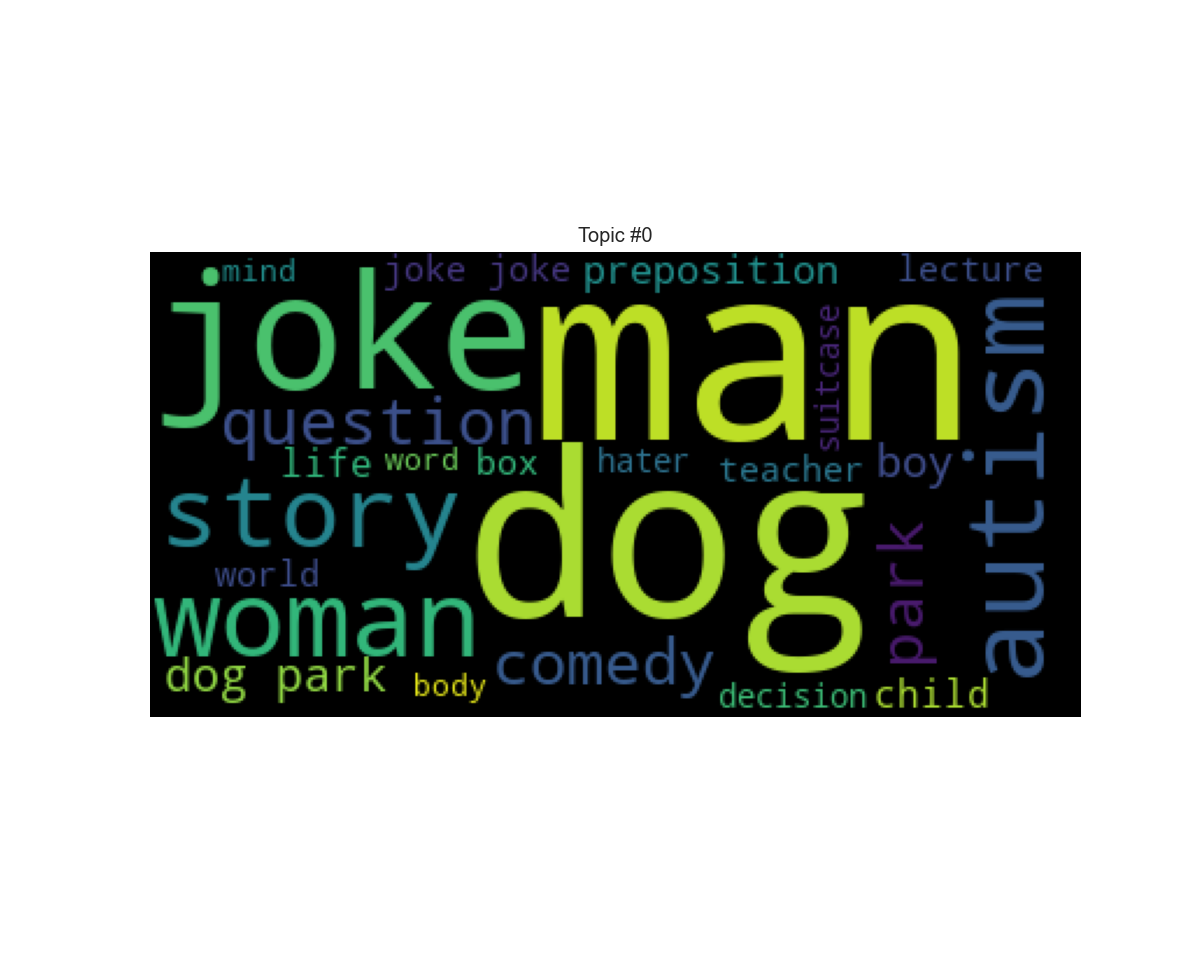

<IPython.core.display.Javascript object>


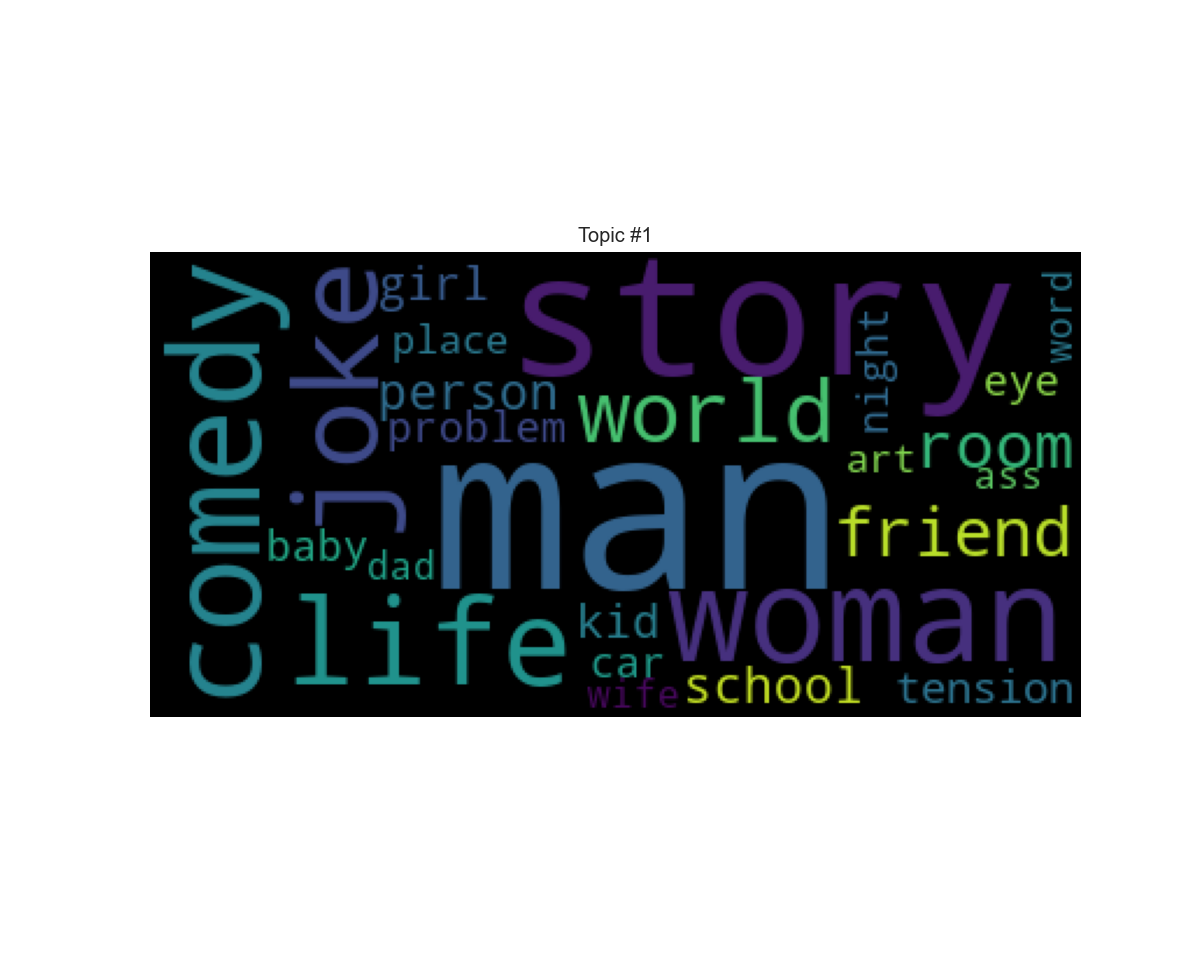

<IPython.core.display.Javascript object>


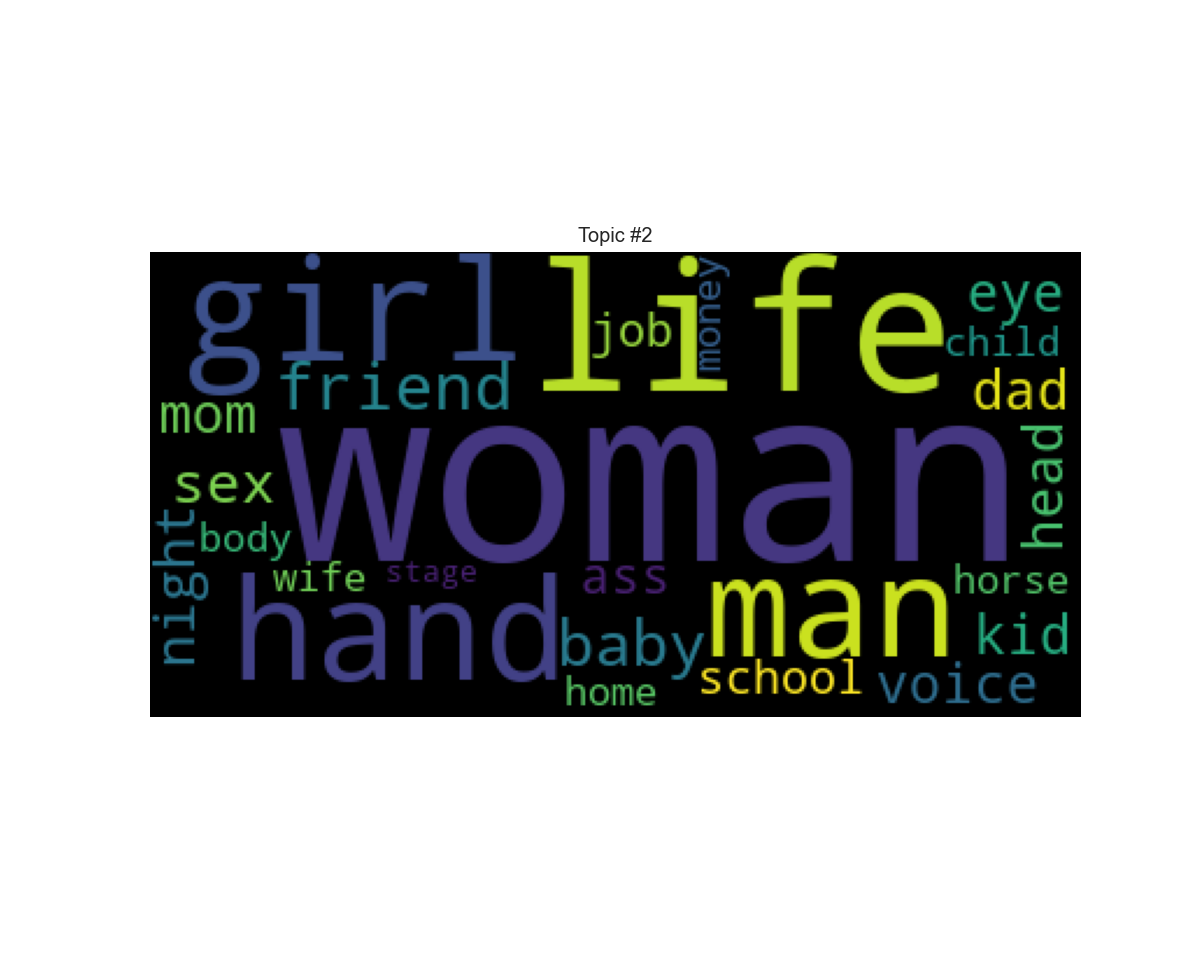

<IPython.core.display.Javascript object>


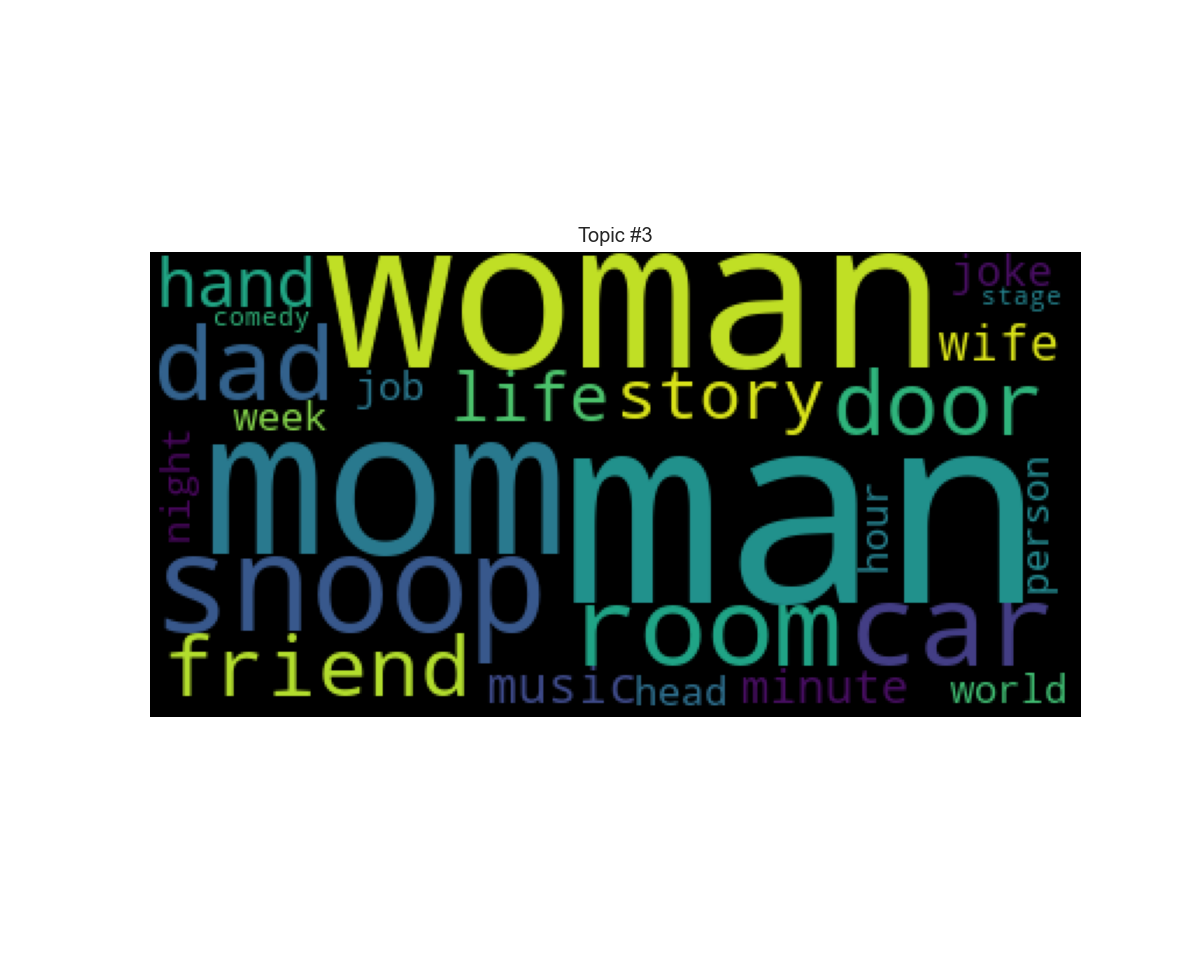

In [228]:
from wordcloud import WordCloud

corpus=matutils.Sparse2Corpus(term_doc)
id2word=dict((v,k) for k,v in vec.vocabulary_.items())
#lda = models.LdaModel(corpus=corpus, num_topics =2, id2word = id2word)
lda= models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=20,random_state=100)


num_words = 25 # Number of words to include in word cloud
for t in range(lda.num_topics):
    plt.figure(figsize=(10,8))
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, num_words))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [220]:
#fitting LDA model
corpus=matutils.Sparse2Corpus(term_doc)
id2word=dict((v,k) for k,v in vec.vocabulary_.items())
#lda = models.LdaModel(corpus=corpus, num_topics =2, id2word = id2word)
lda= models.LdaModel(corpus=corpus,  id2word=id2word, num_topics=4, update_every=1, chunksize=10000, passes=1,random_state=100)
##num_topics=3,
lda.print_topics()

[(0,
  '0.007*"man" + 0.004*"woman" + 0.003*"life" + 0.003*"story" + 0.002*"friend" + 0.002*"dad" + 0.002*"joke" + 0.002*"person" + 0.002*"comedy" + 0.002*"world"'),
 (1,
  '0.008*"man" + 0.004*"woman" + 0.004*"life" + 0.004*"story" + 0.003*"comedy" + 0.003*"friend" + 0.003*"world" + 0.003*"baby" + 0.003*"room" + 0.002*"joke"'),
 (2,
  '0.007*"man" + 0.005*"life" + 0.005*"woman" + 0.004*"girl" + 0.004*"friend" + 0.004*"hand" + 0.003*"night" + 0.003*"wife" + 0.003*"eye" + 0.003*"room"'),
 (3,
  '0.009*"man" + 0.006*"woman" + 0.004*"life" + 0.004*"story" + 0.003*"friend" + 0.003*"joke" + 0.003*"dad" + 0.003*"comedy" + 0.003*"baby" + 0.003*"girl"')]

In [211]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary()
doc_bow = dictionary.doc2bow(text)
doc_lda = lda[doc_bow]
doc_lda

[]

In [212]:
lda_corpus = lda[corpus]
lda_corpus

In [213]:
lda_docs = [doc for doc in lda_corpus]
lda_docs[0:5]

[[(3, 0.30236518), (16, 0.50567126), (56, 0.04781182), (58, 0.14289246)],
 [(3, 0.023444341), (58, 0.9750287)],
 [(3, 0.9986436)],
 [(3, 0.9986583)],
 [(3, 0.99883044)]]

In [214]:
## DBSCAN
#Scale the 
X,y=dataset
X=StandardScaler().fit_transform(X)

from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps= .18,min_samples=3)

NameError: name 'dataset' is not defined

In [ ]:
dbscan.fit(X)


In [ ]:
y_pred=dbscan.labels_
y_pred[:10]

In [ ]:
colorw=np.array(['teal','orange','crimson','black'])#3 cluster, black is noicy
plt.scatter(,,color=colorw[y_pred])